In [1]:
from time import time
import numpy as np
import astropy.units as u
import astropy.constants as c
import astropy.io.fits as pf
import matplotlib.pyplot as plt
import scipy.optimize
from sklearn.model_selection import train_test_split

import gpr
import mcmc
import forAustin as fa

In [2]:
datafile = '/data4/paper/fox/DES/austinFull.fits'
nExposure = 500
# sample = np.array([-0.5, 0, 0, 0.5])
sample = None
GP = gpr.GPR(datafile, nExposure, sample=sample, verbose=False, eps=0, test_size=0.2, random_state=0)

In [3]:
def LML(theta, GP):
    GP.fit(theta)
    LML = GP.get_LML()
    return LML

In [4]:
var_s = 100
sigma_x = ((5 * u.arcmin).to(u.deg)).value
sigma_y = sigma_x
phi = (0 * u.deg).to(u.rad).value
theta0 = (var_s, sigma_x, sigma_y, phi)
bounds = np.array([(0, None), (0, None), (0, None), (0, 2*np.pi)])

In [5]:
%%time
result = scipy.optimize.minimize(LML, theta0, GP, method='L-BFGS-B', bounds=bounds)

CPU times: user 4h 45min 54s, sys: 36min 27s, total: 5h 22min 22s
Wall time: 42min 44s


In [6]:
result

     fun: -2139786.720961049
     jac: array([-5.     ,  0.59375,  0.65625, -0.78125])
 message: 'Optimization terminated successfully.'
    nfev: 93
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.00537895e+02, 4.35615329e+03, 3.95273706e+03, 1.18553581e+00])

Current Log Marginal Likelihood: -2139786.720961049
Standard deviation of validation residuals: dx 20.456, dy 18.408
Standard deviation of Gaussian Process residuals: dx 0.02, dy 0.001
The ratio of validation residuals over GP residuals is: dx 1020.623, dy 28476.639


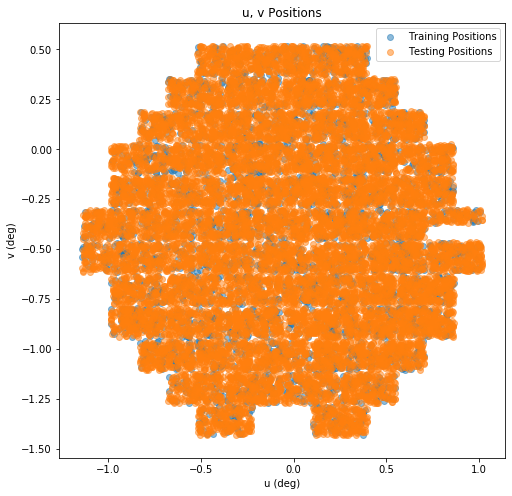

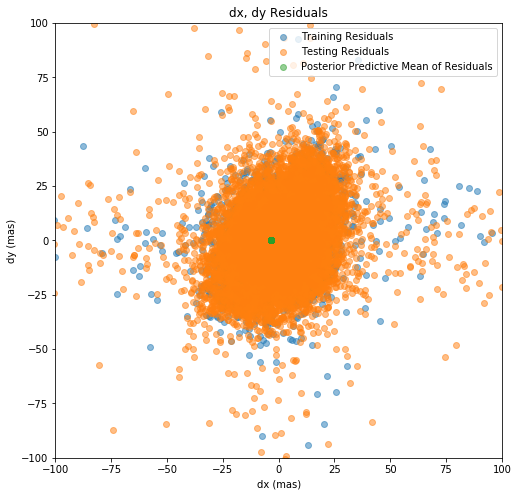

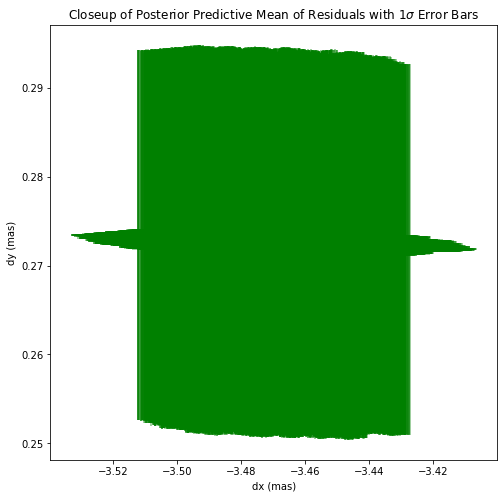

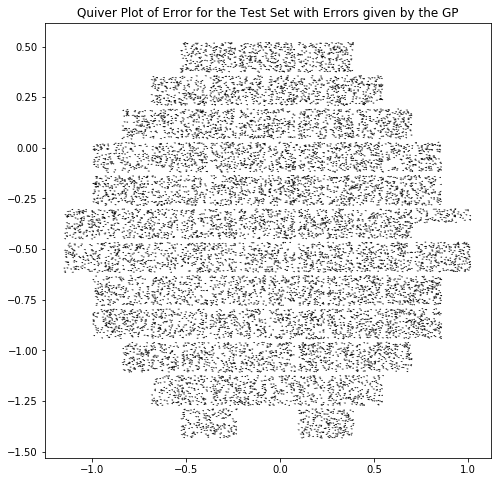

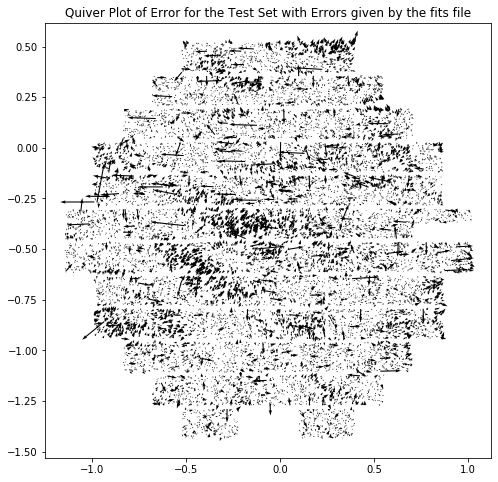

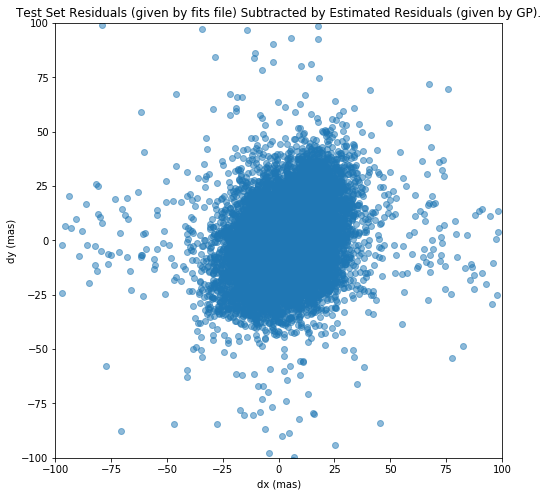

In [7]:
GP.summary()